# MUTHOOT FINANCE STOCK TRADING OPEN PRICE ALGORTHMIC TRADING.

AUTHOR : SHUBHAM GONDRALWAR

DATE WRITTEN: 4 JUNE 2020

The project is adressed with the aim of predicting the Muthoot finance ltd stock open price with the help of machine learning model which helps regular investors to assess their risks and avoid loss situations.

Model building starts with extracting data of stock markets of different countries which enables us to find the muthoot trading day open price(Open price refers to the price when the trading starts on particular day).

Next step is to load the dataset extracted from yahoo finance using pandas and extracting meaningful insights by visualisation using seaborn and matplotlib.

Feature engineering and Feature selection are the most useful techniques used in order to make data meaningful for the machine learning model followed by Hyperparameter tuning.

The model is finalised based on the perfomance of the model in cross validation the data used for testing and LIVE DATA AS WELL.

In order to make it usable for the end user the web application is  made using python(Flask) as an API where the user needs to input the required data in order to get the stock open price of MUTHOOT FINANCE LTD.

# SO LET'S GET STARTED

In [1]:
# WE WILL START BY IMPORTING ALL THE LIBRARIES REQUIRED FOR MODEL BUILDING.
import numpy as np # for numerical operation if any
import pandas as pd # mainly used for loading dataset and to handle dataframe operations
import matplotlib.pyplot as plt # for visulaisation
import seaborn as sns # for visulisation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import model_selection
import math
import datetime

from feature_engine import missing_data_imputers as mdi
from sklearn.pipeline import Pipeline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets.

The first dataset we are going to start with contains features of Escort and nifty stock market and also contains US closing index of previous day( closing price of the previous day) followed by  australia, hongkong,china,japan stock open prices on the same day.

In [2]:
mutt = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/Mutthot finance/muttu.csv")#escort,us,nifty.
mutt.head(10)
#escort.shape

,Date,muttoadjClose,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,muttuopen,NYA adjclose,DJI adclose,SP500
0,06-05-2011,134.278885,2890.634033,4743.000000,23159.14063,9864.259766,5459.850098,2841.620117,175.899994,196.600006,8397.400391,12584.16992,1335.099976
1,09-05-2011,130.805511,2883.419922,4756.799805,23336.00000,9716.650391,5551.450195,2828.229980,171.350006,174.000000,8425.900391,12638.74023,1340.199951
2,10-05-2011,134.622437,2844.083008,4725.799805,23291.80078,9648.769531,5551.100098,2814.719971,176.350006,171.000000,8478.190430,12684.67969,1346.290039
3,11-05-2011,133.668182,2871.031006,4780.200195,23073.75977,9558.299805,5541.250000,2827.560059,175.100006,177.000000,8550.490234,12760.36035,1357.160034
4,12-05-2011,129.049728,2849.066895,4696.100098,23276.26953,9567.019531,5565.049805,2843.250000,169.050003,174.000000,8428.089844,12630.03027,1342.079956
5,13-05-2011,126.759567,2852.772949,4711.399902,22960.63086,9662.080078,5486.149902,2871.889893,166.050003,168.000000,8456.179688,12695.91992,1348.650024
6,16-05-2011,122.522812,2872.770996,4650.000000,22901.08008,9620.820313,5544.750000,2845.060059,160.500000,165.850006,8371.669922,12595.75000,1337.770020
7,17-05-2011,122.064774,2859.573975,4683.899902,23011.14063,9607.080078,5499.000000,2863.040039,159.899994,161.000000,8336.589844,12548.37012,1329.469971
8,18-05-2011,121.492233,2858.458984,4693.700195,23163.38086,9460.629883,5438.950195,2828.469971,159.149994,159.500000,8333.070313,12479.58008,1328.979980
9,19-05-2011,118.705902,2774.569092,4756.399902,23199.39063,9477.169922,5420.600098,2782.310059,155.500000,160.149994,8407.480469,12560.17969,1340.680054


In [3]:
hongkong = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/hongkong.csv")#hangseng market index
hongkong.head()
#hongkong.shape

,Date,hangopen
0,03-01-2011,23135.64063
1,04-01-2011,23477.31055
2,05-01-2011,23650.17969
3,06-01-2011,23861.22070
4,07-01-2011,23744.02930


In [4]:
austrilia = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/australia.csv")#austrilia markey index
austrilia.head()
#austrilia.shape

,Date,austopen
0,31-12-2010,4787.500000
1,04-01-2011,4758.299805
2,05-01-2011,4738.600098
3,06-01-2011,4717.700195
4,07-01-2011,4717.799805


In [5]:
nikkie = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nikkie.csv")#japan index
nikkie.head()
#nikkie.shape

,Date,nikkiesopen
0,04-01-2011,10352.19043
1,05-01-2011,10387.95020
2,06-01-2011,10477.51953
3,07-01-2011,10506.71973
4,11-01-2011,10484.62012


In [6]:
sanghai = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/sanghai.csv")#china market index
sanghai.head()
#sanghai.shape

,Date,sangaiopen
0,31-12-2010,2759.162109
1,04-01-2011,2825.329102
2,05-01-2011,2833.115967
3,06-01-2011,2838.435059
4,07-01-2011,2820.665039


In [7]:
nifty = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/nifty50.csv")#niftyopen
nifty.head()
nifty.shape

(2316, 2)

# FEATURE ENGINEERING

SINCE IT IS REQUIRED TO ANALYZE ALL COUNTRIES INDEX PRICES WHICH MAY ULTIMATELY INFLUENCE OUR ESCORTS OPEN PRICE, LET US MERGE ALL THE LOADED DATASET ABOVE FOR FURTHER ANALYSIS.
SINCE DATE IS THE ONLY FEATURE WHICH IS COMMOM TO ALL INDEXES IT IS BETTER TO MERGE WITH IT(DATE).

NOTE: ONLY THOSE STOCK INDEXES ARE TAKEN WHOSE MARKET OPENS BEFORE INDIAN MARKET EXCEPT UNITED STATE'S NASDAQ'S ( WHOSE PREVIOUS DAY CLOSING INDEX IS CONSIDERED).

In [8]:
df1 = pd.merge(mutt,hongkong,how = "inner",on = "Date")
df2 = pd.merge(df1,austrilia,how = "inner",on = "Date")
df3 = pd.merge(df2,nifty,how = "inner",on = "Date")
df4 = pd.merge(df3,nikkie,how = "inner",on = "Date")
df5 = pd.merge(df4,sanghai,how = "inner",on = "Date")

In [9]:
mutt_main = df5

In [10]:

mutt_main

,Date,muttoadjClose,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,muttuopen,NYA adjclose,DJI adclose,SP500,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,06-05-2011,134.278885,2890.634033,4743.000000,23159.14063,9864.259766,5459.850098,2841.620117,175.899994,196.600006,8397.400391,12584.16992,1335.099976,23035.93945,4734.000000,5477.649902,9851.150391,2842.763916
1,09-05-2011,130.805511,2883.419922,4756.799805,23336.00000,9716.650391,5551.450195,2828.229980,171.350006,174.000000,8425.900391,12638.74023,1340.199951,23249.98047,4752.899902,5575.200195,9881.669922,2868.235107
2,11-05-2011,133.668182,2871.031006,4780.200195,23073.75977,9558.299805,5541.250000,2827.560059,175.100006,177.000000,8550.490234,12760.36035,1357.160034,23509.00977,4739.600098,5547.200195,9912.480469,2890.353027
3,12-05-2011,129.049728,2849.066895,4696.100098,23276.26953,9567.019531,5565.049805,2843.250000,169.050003,174.000000,8428.089844,12630.03027,1342.079956,23112.13086,4755.200195,5537.799805,9770.709961,2864.976074
4,13-05-2011,126.759567,2852.772949,4711.399902,22960.63086,9662.080078,5486.149902,2871.889893,166.050003,168.000000,8456.179688,12695.91992,1348.650024,23120.00000,4699.200195,5492.350098,9751.450195,2846.311035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,19-03-2020,569.816223,2891.555908,6804.899902,22291.82031,17431.050780,8468.799805,6989.839844,583.849976,550.299988,14053.230470,29030.22070,3289.290039,22221.38086,4953.200195,8063.299805,16995.769530,2719.406006
1889,23-03-2020,508.299988,2870.342041,6690.600098,22805.07031,17011.529300,8745.450195,6879.520020,508.299988,548.150024,14183.200200,29348.09961,3329.620117,21696.13086,4753.899902,7945.700195,16570.570310,2677.590088
1890,24-03-2020,514.700012,2868.458984,6733.500000,21696.13086,16726.550780,7610.250000,6860.669922,514.700012,544.150024,14109.980470,29196.03906,3320.790039,22497.57031,4546.000000,7848.299805,17206.880860,2703.019043
1891,25-03-2020,600.799988,2875.417969,6735.700195,22663.49023,16552.830080,7801.049805,7417.859863,600.799988,500.000000,14110.240230,29186.26953,3321.750000,23255.91016,4735.700195,7735.149902,18446.800780,2775.302979


In [11]:
mutt_main.shape

(1893, 18)

In [12]:
mutt_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1893 non-null   object 
 1   muttoadjClose  1893 non-null   float64
 2   sangaiclose    1892 non-null   float64
 3   aust close     1888 non-null   float64
 4   hangsangclose  1887 non-null   float64
 5   nkkiesclose    1879 non-null   float64
 6   nifty50 close  1878 non-null   float64
 7   usclose        1893 non-null   float64
 8   muttuClose     1893 non-null   float64
 9   muttuopen      1893 non-null   float64
 10  NYA adjclose   1893 non-null   float64
 11  DJI adclose    1893 non-null   float64
 12  SP500          1893 non-null   float64
 13  hangopen       1889 non-null   float64
 14  austopen       1889 non-null   float64
 15  niftyopen      1885 non-null   float64
 16  nikkiesopen    1878 non-null   float64
 17  sangaiopen     1892 non-null   float64
dtypes: float

The ESCORTS_MAIN NAMED IS THE FINAL DATASET FOR WHICH ANALYSIS NEEDS TO BE DONE WHICH HAS 1959 ROWS AND 14 COLUMNS FROM WHICH STOCKOPEN IS THE DEPENDENT VARIABLE AND REMAINING ARE INDEPEDENT VARIABLE.
ALSO IT CAN BE CLEARLY SEEN THAT DATE IS OBJECT DATATYPE AND REMAINING ARE FLOAT TYPE SO DATE MUST BE CONVERTED TO DATETIME VARIABLE.


CONVERTING DATE OBJECT TO DATETIME VARIABLE FOLLOWED BY SPLITTING THEM INTO DAY MONTH AND YEAR AS MACHINE LEARNING MODEL CANNIT LEARN OBJECT DATATYE.

In [13]:
mutt_main.head()

,Date,muttoadjClose,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,muttuopen,NYA adjclose,DJI adclose,SP500,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,06-05-2011,134.278885,2890.634033,4743.000000,23159.14063,9864.259766,5459.850098,2841.620117,175.899994,196.600006,8397.400391,12584.16992,1335.099976,23035.93945,4734.000000,5477.649902,9851.150391,2842.763916
1,09-05-2011,130.805511,2883.419922,4756.799805,23336.00000,9716.650391,5551.450195,2828.229980,171.350006,174.000000,8425.900391,12638.74023,1340.199951,23249.98047,4752.899902,5575.200195,9881.669922,2868.235107
2,11-05-2011,133.668182,2871.031006,4780.200195,23073.75977,9558.299805,5541.250000,2827.560059,175.100006,177.000000,8550.490234,12760.36035,1357.160034,23509.00977,4739.600098,5547.200195,9912.480469,2890.353027
3,12-05-2011,129.049728,2849.066895,4696.100098,23276.26953,9567.019531,5565.049805,2843.250000,169.050003,174.000000,8428.089844,12630.03027,1342.079956,23112.13086,4755.200195,5537.799805,9770.709961,2864.976074
4,13-05-2011,126.759567,2852.772949,4711.399902,22960.63086,9662.080078,5486.149902,2871.889893,166.050003,168.000000,8456.179688,12695.91992,1348.650024,23120.00000,4699.200195,5492.350098,9751.450195,2846.311035



# MISSING VALUE ANALYISIS


THE MISSING VALUES STARTS WITH FINDING OUT WHEATHER THERE IS ANY REASON FOR MISSING DATA AND HOW MUCH PERCENTAGE IS MISSING.

In [14]:
mutt_main.isnull().mean()

Date             0.000000
muttoadjClose    0.000000
sangaiclose      0.000528
aust close       0.002641
hangsangclose    0.003170
nkkiesclose      0.007396
nifty50 close    0.007924
usclose          0.000000
muttuClose       0.000000
muttuopen        0.000000
NYA adjclose     0.000000
DJI adclose      0.000000
SP500            0.000000
hangopen         0.002113
austopen         0.002113
niftyopen        0.004226
nikkiesopen      0.007924
sangaiopen       0.000528
dtype: float64

In [15]:

mutt_main.isnull().sum()

Date              0
muttoadjClose     0
sangaiclose       1
aust close        5
hangsangclose     6
nkkiesclose      14
nifty50 close    15
usclose           0
muttuClose        0
muttuopen         0
NYA adjclose      0
DJI adclose       0
SP500             0
hangopen          4
austopen          4
niftyopen         8
nikkiesopen      15
sangaiopen        1
dtype: int64

In [16]:
imputer = mdi.MeanMedianImputer(imputation_method='median')

IT CAN BE CLEARLY OBSERVED THAT LESS THAN 5% OF THE DATA IS MISSING.
TO IDENTIFY THE BEST IMPUTATION TECHNIQUE I AM USING GRIDSEARCH CV.
SPLITING THE DATASET INTO TRAIN AND TEST BEFORE IMPUTATION IS IMPORTANT TO AVOID OVERFITTING.

USING FEATURE ENGINE LIBRARY FOR MISSING DATA IMPUTATION

In [17]:
imputer.fit(mutt_main)

MeanMedianImputer(imputation_method='median',
                  variables=['muttoadjClose', 'sangaiclose', 'aust close',
                             'hangsangclose', 'nkkiesclose', 'nifty50 close',
                             'usclose', 'muttuClose', 'muttuopen',
                             'NYA adjclose', 'DJI adclose', 'SP500', 'hangopen',
                             'austopen', 'niftyopen', 'nikkiesopen',
                             'sangaiopen'])



The median values for all the features are given below.

In [18]:
imputer.imputer_dict_

{'muttoadjClose': 172.60054,
 'sangaiclose': 2858.8974609999996,
 'aust close': 5442.75,
 'hangsangclose': 23394.39063,
 'nkkiesclose': 17442.40039,
 'nifty50 close': 8210.199707,
 'usclose': 4927.879883,
 'muttuClose': 203.800003,
 'muttuopen': 204.300003,
 'NYA adjclose': 10749.049809999999,
 'DJI adclose': 17737.0,
 'SP500': 2075.149902,
 'hangopen': 23399.50977,
 'austopen': 5453.299805,
 'niftyopen': 8202.650391,
 'nikkiesopen': 17380.95996,
 'sangaiopen': 2847.552979}

In [19]:
mutt_main = imputer.transform(mutt_main)
mutt_main.columns

Index(['Date', 'muttoadjClose', 'sangaiclose', 'aust close', 'hangsangclose',
       'nkkiesclose', 'nifty50 close', 'usclose', 'muttuClose', 'muttuopen',
       'NYA adjclose', 'DJI adclose', 'SP500', 'hangopen', 'austopen',
       'niftyopen', 'nikkiesopen', 'sangaiopen'],
      dtype='object')

In [20]:
mutt_main.isnull().sum()

Date             0
muttoadjClose    0
sangaiclose      0
aust close       0
hangsangclose    0
nkkiesclose      0
nifty50 close    0
usclose          0
muttuClose       0
muttuopen        0
NYA adjclose     0
DJI adclose      0
SP500            0
hangopen         0
austopen         0
niftyopen        0
nikkiesopen      0
sangaiopen       0
dtype: int64

In [21]:
mutt_main.describe().T

,count,mean,std,min,25%,50%,75%,max
muttoadjClose,1893.0,276.328020,182.142838,59.052254,139.660736,172.600540,404.987396,921.699951
sangaiclose,1893.0,2800.797910,552.430466,1950.011963,2309.554932,2858.897461,3152.760986,5166.350098
aust close,1893.0,5401.208054,686.382600,3863.899902,5004.600098,5442.750000,5861.399902,6864.000000
hangsangclose,1893.0,24157.300250,3302.682570,16250.269530,21832.679690,23394.390630,26848.490230,33154.121090
nkkiesclose,1893.0,16875.273286,4719.182774,8160.009766,14055.559570,17442.400390,20774.039060,24270.619140
nifty50 close,1893.0,8217.141155,2201.470939,4544.200195,5998.899902,8210.199707,10283.599610,12362.299810
usclose,1893.0,5192.455552,1839.987661,2341.840088,3589.870117,4927.879883,6875.799805,9817.179688
muttuClose,1893.0,302.094110,179.044997,74.949997,172.300003,203.800003,429.649994,944.400024
muttuopen,1893.0,302.315716,178.856329,74.500000,172.449997,204.300003,430.000000,945.000000
NYA adjclose,1893.0,10622.609693,1758.706957,6770.729980,9413.780273,10749.049810,12157.650390,14183.200200


AS WE ARE GOING TO DO MODEL BUILDING WITH BASIC LINEAR REGRESSION WHICH ASSUMES DISTRIBUTION OF THE FEATURES TO BE NORMAL.


SO LET'S VISUALISE DISTRIBUTION OF ALL THE FEATURES OUTLIERS AS WELL.

In [22]:
def plot(df,variable):
    plt.figure(figsize = (13,3))
    plt.subplot(1,3,1)
    sns.distplot(df[variable],color = "red")
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist = 'norm',plot=plt)
    
    plt.subplot(1,3,3)
    plt.boxplot(df[variable])

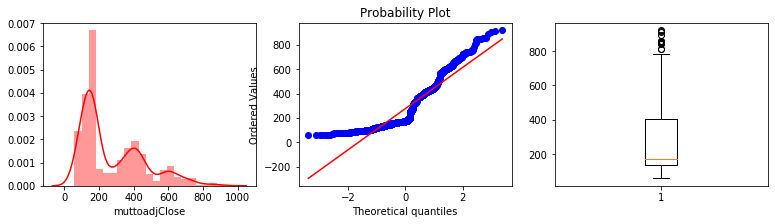

In [25]:
plot(mutt_main,'muttoadjClose')

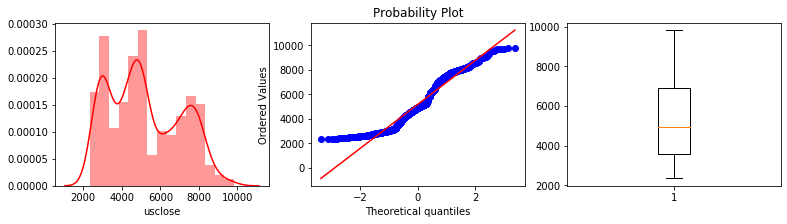

In [26]:
plot(mutt_main,'usclose')

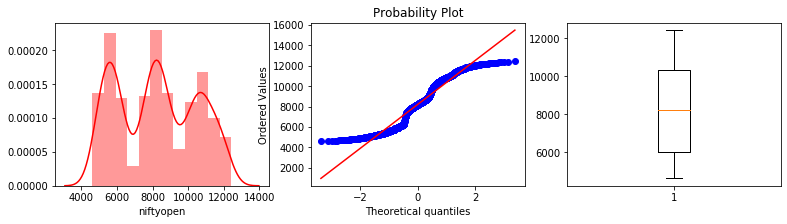

In [27]:
plot(mutt_main,'niftyopen')

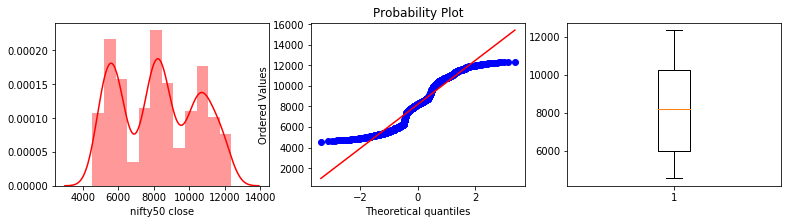

In [28]:
plot(mutt_main,'nifty50 close')

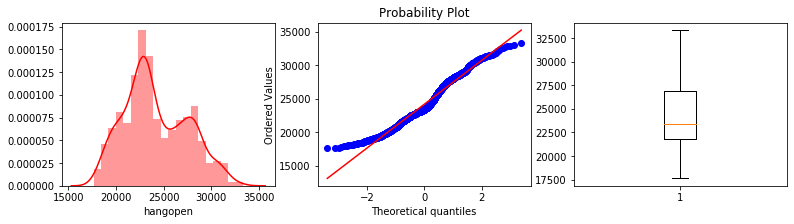

In [29]:
plot(mutt_main,'hangopen')

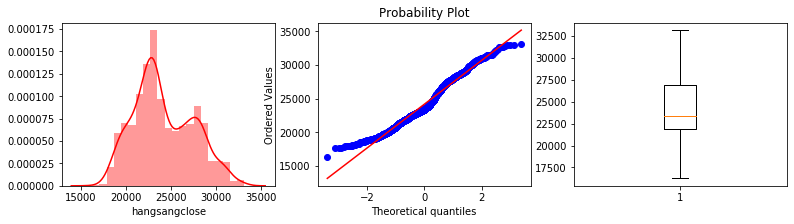

In [30]:
plot(mutt_main,'hangsangclose')


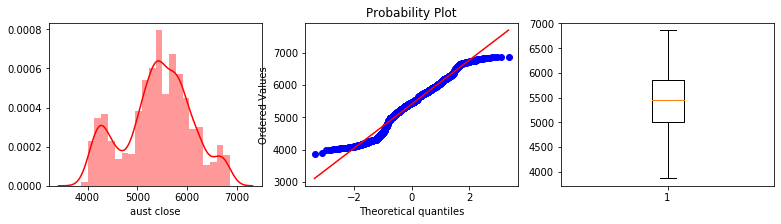

In [31]:
plot(mutt_main,'aust close')

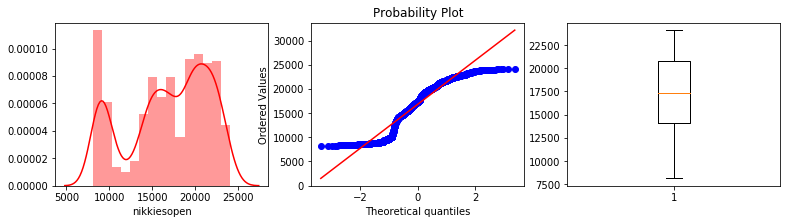

In [34]:
plot(mutt_main,"nikkiesopen")

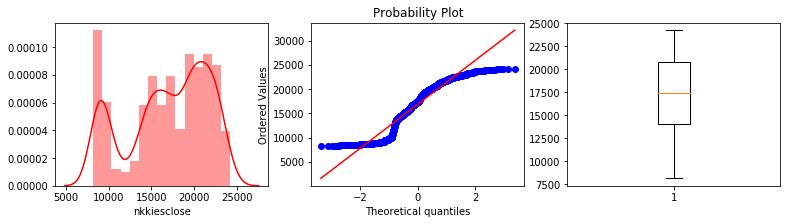

In [35]:
plot(mutt_main,"nkkiesclose")

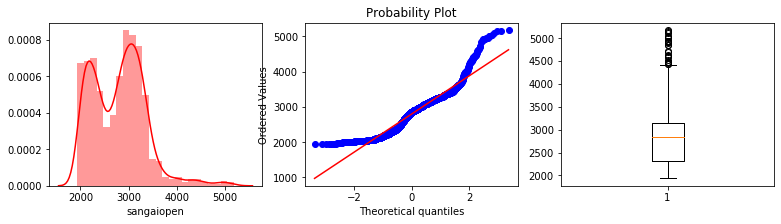

In [36]:
plot(mutt_main,'sangaiopen')

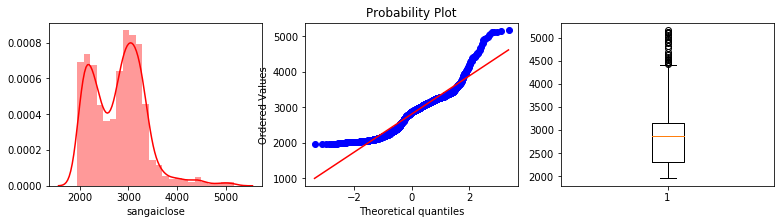

In [37]:

plot(mutt_main,'sangaiclose')

In [38]:
mutt_main = mutt_main.drop(["Date"],axis = 1)

AS IT CAN BE CLEARLY SEEN THAT OUTLIERS ARE PRESENT IN SOME FEATURES, SINCE LINEAR MODELS ARE SUSEPTABLE TO OUTLIERS WHICH CAN HAVE NEGATIVE IMPACT ON FINDING BEST FIT LINE SO IT IS ALWAYS BETTER TO REMOVE OUTLIERS.

In [39]:
def outlierhandle(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [40]:
for column in mutt_main.columns:
    lr,ur=outlierhandle(mutt_main[column])
    mutt_main[column]=np.where(mutt_main[column]>ur,ur,mutt_main[column])
    mutt_main[column]=np.where(mutt_main[column]<lr,lr,mutt_main[column])

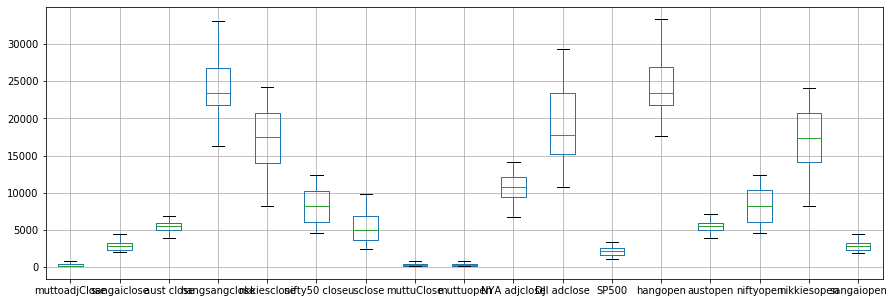

In [41]:
mutt_main.boxplot(figsize=(15,5))

In [42]:
mutt_main.head()

,muttoadjClose,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,muttuopen,NYA adjclose,DJI adclose,SP500,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
0,134.278885,2890.634033,4743.000000,23159.14063,9864.259766,5459.850098,2841.620117,175.899994,196.600006,8397.400391,12584.16992,1335.099976,23035.93945,4734.000000,5477.649902,9851.150391,2842.763916
1,130.805511,2883.419922,4756.799805,23336.00000,9716.650391,5551.450195,2828.229980,171.350006,174.000000,8425.900391,12638.74023,1340.199951,23249.98047,4752.899902,5575.200195,9881.669922,2868.235107
2,133.668182,2871.031006,4780.200195,23073.75977,9558.299805,5541.250000,2827.560059,175.100006,177.000000,8550.490234,12760.36035,1357.160034,23509.00977,4739.600098,5547.200195,9912.480469,2890.353027
3,129.049728,2849.066895,4696.100098,23276.26953,9567.019531,5565.049805,2843.250000,169.050003,174.000000,8428.089844,12630.03027,1342.079956,23112.13086,4755.200195,5537.799805,9770.709961,2864.976074
4,126.759567,2852.772949,4711.399902,22960.63086,9662.080078,5486.149902,2871.889893,166.050003,168.000000,8456.179688,12695.91992,1348.650024,23120.00000,4699.200195,5492.350098,9751.450195,2846.311035


In [45]:
mutt_main.columns

Index(['muttoadjClose', 'sangaiclose', 'aust close', 'hangsangclose',
       'nkkiesclose', 'nifty50 close', 'usclose', 'muttuClose', 'muttuopen',
       'NYA adjclose', 'DJI adclose', 'SP500', 'hangopen', 'austopen',
       'niftyopen', 'nikkiesopen', 'sangaiopen'],
      dtype='object')



LETS DRAW SCATTERPLOT TO SEE THE RELEATIONSHIPS BETWEEN INDEPENDENT AND DEPENDENT VARIABLES.

In [46]:
#sns.pairplot(mutt_main,diag_kind='kde')

# FEATURE SELECTION AND MODEL BUILDING

LINEAR MODEL WILL BE BUILD FIRST AS MOST OF THE FEATURES ARE LINEARLY CORRELATED.

LET US USE FILTER METHOD BASED ON R VALUE WHICH WORKS ON BAISIS OF FINDING THE SUM OF AREAS OF RECTANGLES FROMED IN THE FUR QUDRANTS  ALSO CALLED PEARSONS CORRELATION.

In [47]:
correlation = mutt_main.corr()
correlation

,muttoadjClose,sangaiclose,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,muttuopen,NYA adjclose,DJI adclose,SP500,hangopen,austopen,niftyopen,nikkiesopen,sangaiopen
muttoadjClose,1.000000,0.369073,0.803230,0.713626,0.744256,0.891973,0.915662,0.999054,0.997822,0.815254,0.910454,0.889056,0.709177,0.813007,0.892822,0.741619,0.376147
sangaiclose,0.369073,1.000000,0.468241,0.478728,0.621715,0.539738,0.470201,0.364208,0.364608,0.473845,0.420984,0.473989,0.477576,0.470576,0.542021,0.618734,0.936269
aust close,0.803230,0.468241,1.000000,0.784684,0.910502,0.899052,0.913983,0.786775,0.786557,0.964394,0.923083,0.943927,0.786503,0.945409,0.901057,0.910367,0.472609
hangsangclose,0.713626,0.478728,0.784684,1.000000,0.810064,0.832666,0.818921,0.709726,0.710391,0.833902,0.817673,0.797931,0.988620,0.816431,0.835161,0.807657,0.507286
nkkiesclose,0.744256,0.621715,0.910502,0.810064,1.000000,0.923936,0.919964,0.726022,0.726205,0.941345,0.900984,0.930102,0.809990,0.913163,0.927007,0.986894,0.637315
nifty50 close,0.891973,0.539738,0.899052,0.832666,0.923936,1.000000,0.973832,0.881195,0.881172,0.938755,0.957029,0.963437,0.832722,0.918570,0.993049,0.925352,0.545590
usclose,0.915662,0.470201,0.913983,0.818921,0.919964,0.973832,1.000000,0.902316,0.901888,0.948549,0.984445,0.983400,0.819053,0.921211,0.975169,0.921474,0.494414
muttuClose,0.999054,0.364208,0.786775,0.709726,0.726022,0.881195,0.902316,1.000000,0.998744,0.798439,0.896828,0.873379,0.705213,0.798362,0.882027,0.722951,0.370385
muttuopen,0.997822,0.364608,0.786557,0.710391,0.726205,0.881172,0.901888,0.998744,1.000000,0.798409,0.896541,0.873142,0.705877,0.798018,0.882032,0.722747,0.371392
NYA adjclose,0.815254,0.473845,0.964394,0.833902,0.941345,0.938755,0.948549,0.798439,0.798409,1.000000,0.963457,0.979972,0.832536,0.931799,0.940054,0.940802,0.489765


In [48]:
cortarget = abs(correlation["muttuopen"])
features = cortarget[cortarget>0.7]
features

muttoadjClose    0.997822
aust close       0.786557
hangsangclose    0.710391
nkkiesclose      0.726205
nifty50 close    0.881172
usclose          0.901888
muttuClose       0.998744
muttuopen        1.000000
NYA adjclose     0.798409
DJI adclose      0.896541
SP500            0.873142
hangopen         0.705877
austopen         0.798018
niftyopen        0.882032
nikkiesopen      0.722747
Name: muttuopen, dtype: float64

SINCE R VALUE DEFINES THE LINEAR RELATIONSHIPS BETWEEN FEATURES AND MORE THAN 0.7 VALUE IS CONSIDERED TO BE BETTER.

In [49]:
Y = mutt_main['muttuopen']

In [50]:
mutt_main.columns

Index(['muttoadjClose', 'sangaiclose', 'aust close', 'hangsangclose',
       'nkkiesclose', 'nifty50 close', 'usclose', 'muttuClose', 'muttuopen',
       'NYA adjclose', 'DJI adclose', 'SP500', 'hangopen', 'austopen',
       'niftyopen', 'nikkiesopen', 'sangaiopen'],
      dtype='object')

# To avoid the problem of multicolinearity dropping highely correlated independent features is better while bulding the model.

In [51]:
X= mutt_main.drop(['muttoadjClose','sangaiopen','sangaiclose','muttuopen','hangopen','niftyopen','austopen','nikkiesopen','NYA adjclose'], axis=1)
X.columns

Index(['aust close', 'hangsangclose', 'nkkiesclose', 'nifty50 close',
       'usclose', 'muttuClose', 'DJI adclose', 'SP500'],
      dtype='object')

In [52]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state =35)

# Linear Regression(Grid search CV for finding best hyperparameters).

In [53]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)
print("r2 / variance : ", grid.best_score_)
print("bestparameters : ", grid.best_params_)


r2 / variance :  0.9973332563376921
bestparameters :  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


# Parameter Tuning and selecting the best parameters

In [54]:
model = LinearRegression(normalize=True,copy_X= True, fit_intercept= True)

In [55]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [56]:
X_test

,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,DJI adclose,SP500
1430,5960.600098,32930.69922,23631.880860,10817.000000,7296.049805,434.250000,24140.91016,2629.270020
134,4193.399902,18026.83984,8336.480469,4613.100098,2596.379883,154.800003,12021.38965,1236.469971
1561,6197.600098,28271.26953,22270.380860,11551.750000,7821.009766,406.200012,24456.48047,2759.820068
688,5531.700195,24890.33984,15322.599610,7683.649902,4432.149902,177.250000,17113.53906,1983.530029
585,5190.000000,22388.56055,14841.070310,6001.100098,4103.879883,165.750000,15445.24023,1755.199951
...,...,...,...,...,...,...,...,...
896,5515.700195,24514.16016,20392.769530,8375.049805,5111.729980,193.649994,17776.91016,2081.340088
693,5583.500000,25159.75977,15613.250000,7625.950195,4449.560059,178.550003,16912.10938,1969.949951
334,4361.399902,21708.98047,9446.009766,5727.450195,2853.129883,206.949997,12788.50977,1387.810059
376,4921.100098,23413.25000,11372.339840,5938.799805,3142.129883,213.199997,13880.08008,1495.709961


In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("the mean absolute error is:",mean_absolute_error(y_test,y_pred))
mse_linear = mean_squared_error(y_pred,y_test)
print("the meansquared error is:",mse_linear)

the mean absolute error is: 4.340277301845333
the meansquared error is: 34.1906312176638


In [59]:
 prediction = model.predict(X_train)

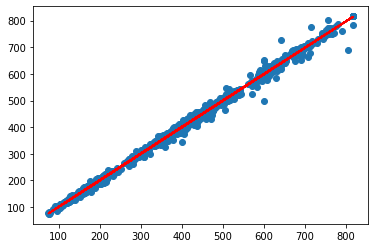

In [60]:
plt.scatter(X_train["muttuClose"],y_train)
plt.plot(X_train["muttuClose"], prediction, color='red')


In [61]:
yhat = grid.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)       
SS_Total = sum((y_train-np.mean(y_train))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.997426795342709 0.9974152885583275


In [62]:
y_pred = grid.predict(X_test)

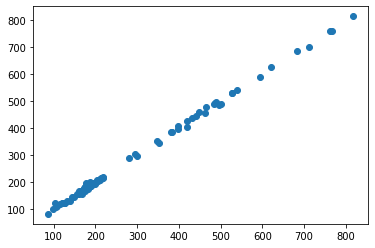

In [63]:
plt.scatter(y_test, y_pred)

In [64]:
X_test["predictedstock"] = y_pred

In [65]:
X_test["actualstock"] = y_test

# Perfomance on Test Data:

In [66]:
X_test

,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,DJI adclose,SP500,predictedstock,actualstock
1430,5960.600098,32930.69922,23631.880860,10817.000000,7296.049805,434.250000,24140.91016,2629.270020,435.416823,431.200012
134,4193.399902,18026.83984,8336.480469,4613.100098,2596.379883,154.800003,12021.38965,1236.469971,154.134577,156.199997
1561,6197.600098,28271.26953,22270.380860,11551.750000,7821.009766,406.200012,24456.48047,2759.820068,407.192711,398.600006
688,5531.700195,24890.33984,15322.599610,7683.649902,4432.149902,177.250000,17113.53906,1983.530029,178.603360,173.350006
585,5190.000000,22388.56055,14841.070310,6001.100098,4103.879883,165.750000,15445.24023,1755.199951,165.567524,160.649994
...,...,...,...,...,...,...,...,...,...,...
896,5515.700195,24514.16016,20392.769530,8375.049805,5111.729980,193.649994,17776.91016,2081.340088,194.336925,194.699997
693,5583.500000,25159.75977,15613.250000,7625.950195,4449.560059,178.550003,16912.10938,1969.949951,179.795255,176.000000
334,4361.399902,21708.98047,9446.009766,5727.450195,2853.129883,206.949997,12788.50977,1387.810059,207.225652,204.699997
376,4921.100098,23413.25000,11372.339840,5938.799805,3142.129883,213.199997,13880.08008,1495.709961,213.453710,215.100006


In [67]:
mselinear = mean_squared_error(X_test["predictedstock"],X_test["actualstock"]) 
print("The mean sqaured error is:",mselinear)

The mean sqaured error is: 34.1906312176638


# The mean sqaured error is: 34.198284850421286

# Perfomance on APRIL AND MAY Last week DATA.

In [107]:
test = pd.read_csv("F:/Data science and web devlopmemnt/value c assignments/assignment 3/Mutthot finance/muttulive.csv")
test.head(20)

,Date,muttuopen,austclose,hangsangClose,nikkies Close,niftyClose,usclose,muttuClose,DJIclose,Sp 500
0,08-04-2020,662.299988,5252.299805,24253.28906,18950.17969,8792.200195,7887.259766,675.849976,22653.85938,2659.409912
1,13-04-2020,700.000000,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,687.150024,23433.57031,2749.979980
2,16-04-2020,743.000000,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,734.950012,23719.36914,2789.820068
3,22-04-2020,735.000000,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,746.000000,23390.76953,2761.629883
4,23-04-2020,672.000000,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,691.299988,23949.75977,2846.060059
5,28-04-2020,714.750000,5321.399902,24280.14063,19783.22070,9282.299805,8730.160156,706.799988,23537.67969,2799.550049
6,29-04-2020,719.950012,5313.100098,24575.96094,19785.34560,9380.900391,8607.730469,735.000000,24242.49023,2874.560059
7,06-05-2020,717.500000,5407.100098,23868.66016,19619.98000,9205.599609,8809.120117,721.049988,23650.43945,2823.159912
8,07-05-2020,768.700012,5384.600098,24137.48047,19619.34961,9270.900391,8854.389648,759.900024,23018.88086,2736.560059
9,08-05-2020,809.400024,5364.200195,23980.63086,19674.76953,9199.049805,8979.660156,817.299988,23475.82031,2799.310059


In [108]:
teststock_open = test["muttuopen"]


In [109]:
date = test["Date"]

In [110]:
test = test.drop(['Date','muttuopen'],axis = 1)

In [111]:
test.head()

,austclose,hangsangClose,nikkies Close,niftyClose,usclose,muttuClose,DJIclose,Sp 500
0,5252.299805,24253.28906,18950.17969,8792.200195,7887.259766,675.849976,22653.85938,2659.409912
1,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,687.150024,23433.57031,2749.979980
2,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,734.950012,23719.36914,2789.820068
3,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,746.000000,23390.76953,2761.629883
4,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,691.299988,23949.75977,2846.060059


In [112]:
predlive = grid.predict(test)
predlive

array([673.00872485, 684.34305988, 731.54296985, 742.64747536,
       688.53131038, 703.61505313, 732.03292669, 717.63039386,
       756.03880617, 813.03330928, 809.53894277, 815.81586027,
       822.32031892, 819.59544993])

In [113]:
test["actual_live_muttu"] = teststock_open 

In [114]:
test["predicted_live_muttu"] = predlive

In [115]:
test

,austclose,hangsangClose,nikkies Close,niftyClose,usclose,muttuClose,DJIclose,Sp 500,actual_live_muttu,predicted_live_muttu
0,5252.299805,24253.28906,18950.17969,8792.200195,7887.259766,675.849976,22653.85938,2659.409912,662.299988,673.008725
1,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,687.150024,23433.57031,2749.979980,700.000000,684.343060
2,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,734.950012,23719.36914,2789.820068,743.000000,731.542970
3,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,746.000000,23390.76953,2761.629883,735.000000,742.647475
4,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,691.299988,23949.75977,2846.060059,672.000000,688.531310
5,5321.399902,24280.14063,19783.22070,9282.299805,8730.160156,706.799988,23537.67969,2799.550049,714.750000,703.615053
6,5313.100098,24575.96094,19785.34560,9380.900391,8607.730469,735.000000,24242.49023,2874.560059,719.950012,732.032927
7,5407.100098,23868.66016,19619.98000,9205.599609,8809.120117,721.049988,23650.43945,2823.159912,717.500000,717.630394
8,5384.600098,24137.48047,19619.34961,9270.900391,8854.389648,759.900024,23018.88086,2736.560059,768.700012,756.038806
9,5364.200195,23980.63086,19674.76953,9199.049805,8979.660156,817.299988,23475.82031,2799.310059,809.400024,813.033309


In [77]:
mean_squared_error(test["actual_live_muttu"],test["predicted_live_muttu"])**0.5

12.145771843881105

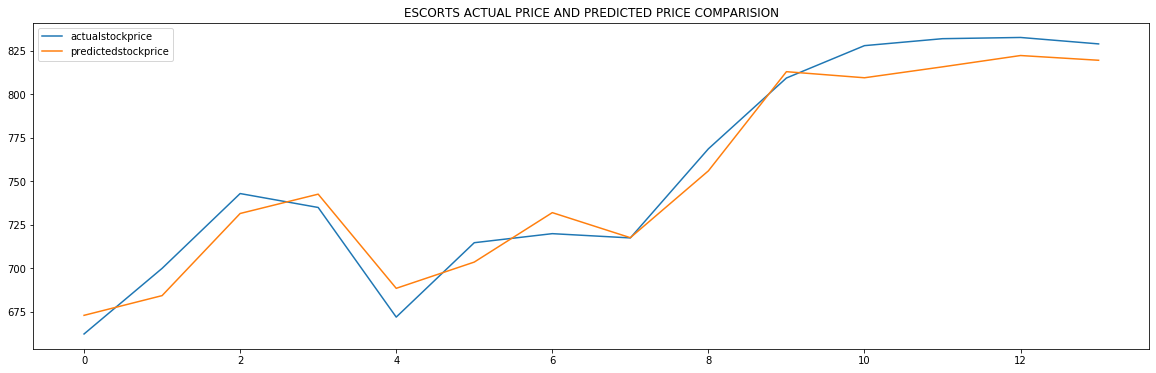

In [78]:
plt.figure(figsize = (20,6))
plt.plot(test["actual_live_muttu"])
plt.plot(test["predicted_live_muttu"])
plt.legend(['actualstockprice','predictedstockprice'], loc='upper left')
plt.title("ESCORTS ACTUAL PRICE AND PREDICTED PRICE COMPARISION")
plt.show()

# Model building using lasso regression

In [116]:
from sklearn.linear_model import Lasso

In [117]:
X_test

,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,DJI adclose,SP500,predictedstock,actualstock
1430,5960.600098,32930.69922,23631.880860,10817.000000,7296.049805,434.250000,24140.91016,2629.270020,435.416823,431.200012
134,4193.399902,18026.83984,8336.480469,4613.100098,2596.379883,154.800003,12021.38965,1236.469971,154.134577,156.199997
1561,6197.600098,28271.26953,22270.380860,11551.750000,7821.009766,406.200012,24456.48047,2759.820068,407.192711,398.600006
688,5531.700195,24890.33984,15322.599610,7683.649902,4432.149902,177.250000,17113.53906,1983.530029,178.603360,173.350006
585,5190.000000,22388.56055,14841.070310,6001.100098,4103.879883,165.750000,15445.24023,1755.199951,165.567524,160.649994
...,...,...,...,...,...,...,...,...,...,...
896,5515.700195,24514.16016,20392.769530,8375.049805,5111.729980,193.649994,17776.91016,2081.340088,194.336925,194.699997
693,5583.500000,25159.75977,15613.250000,7625.950195,4449.560059,178.550003,16912.10938,1969.949951,179.795255,176.000000
334,4361.399902,21708.98047,9446.009766,5727.450195,2853.129883,206.949997,12788.50977,1387.810059,207.225652,204.699997
376,4921.100098,23413.25000,11372.339840,5938.799805,3142.129883,213.199997,13880.08008,1495.709961,213.453710,215.100006


# Tuning hyperparamters to find best hyperparameters:

In [118]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=10000000)
parameters={'alpha':[0.000001,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'random_state':[1,56,42,35,550],'normalize':[True,False]}
lasso_regressor=GridSearchCV(lasso,parameters,cv=20)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=10000000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100],
                         'normalize': [True, False],
                         'random_state': [1, 56, 42, 35, 550]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [119]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01, 'normalize': True, 'random_state': 1}
0.997303601450505


In [120]:
lasso=Lasso(max_iter=100000000,alpha= 5, normalize=False, random_state= 1)
lasso.fit(X_train,y_train)

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=100000000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
x_test_lasso = X_test.drop(["predictedstock","actualstock"],axis = 1)

In [122]:
predlasso = lasso.predict(x_test_lasso)

In [123]:
mean_squared_error(predlasso,y_test)

34.23719370831232

# The mean sqaured error is 34.23

In [124]:
test.columns

Index(['austclose', 'hangsangClose', 'nikkies Close', 'niftyClose', 'usclose',
       'muttuClose', 'DJIclose', 'Sp 500', 'actual_live_muttu',
       'predicted_live_muttu'],
      dtype='object')

In [125]:
test_lasso = test.drop(["actual_live_muttu","predicted_live_muttu"],axis = 1)

In [126]:
predlive_lasso = lasso.predict(test_lasso)

In [127]:
test["predictedlasso"] = predlive_lasso

In [128]:
test

,austclose,hangsangClose,nikkies Close,niftyClose,usclose,muttuClose,DJIclose,Sp 500,actual_live_muttu,predicted_live_muttu,predictedlasso
0,5252.299805,24253.28906,18950.17969,8792.200195,7887.259766,675.849976,22653.85938,2659.409912,662.299988,673.008725,672.223040
1,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,687.150024,23433.57031,2749.979980,700.000000,684.343060,683.598709
2,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,734.950012,23719.36914,2789.820068,743.000000,731.542970,730.726969
3,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,746.000000,23390.76953,2761.629883,735.000000,742.647475,741.728610
4,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,691.299988,23949.75977,2846.060059,672.000000,688.531310,687.685450
5,5321.399902,24280.14063,19783.22070,9282.299805,8730.160156,706.799988,23537.67969,2799.550049,714.750000,703.615053,702.839960
6,5313.100098,24575.96094,19785.34560,9380.900391,8607.730469,735.000000,24242.49023,2874.560059,719.950012,732.032927,731.134558
7,5407.100098,23868.66016,19619.98000,9205.599609,8809.120117,721.049988,23650.43945,2823.159912,717.500000,717.630394,716.850206
8,5384.600098,24137.48047,19619.34961,9270.900391,8854.389648,759.900024,23018.88086,2736.560059,768.700012,756.038806,755.271919
9,5364.200195,23980.63086,19674.76953,9199.049805,8979.660156,817.299988,23475.82031,2799.310059,809.400024,813.033309,812.111447


# VOTING BASED ENSEMBLE TECHNIQUE

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import VotingRegressor

In [130]:
mutt_main.columns

Index(['muttoadjClose', 'sangaiclose', 'aust close', 'hangsangclose',
       'nkkiesclose', 'nifty50 close', 'usclose', 'muttuClose', 'muttuopen',
       'NYA adjclose', 'DJI adclose', 'SP500', 'hangopen', 'austopen',
       'niftyopen', 'nikkiesopen', 'sangaiopen'],
      dtype='object')

In [132]:
mutt_main = mutt_main.drop(['sangaiclose','niftyopen','nikkiesopen','hangopen','austopen','sangaiopen','muttoadjClose','NYA adjclose'],axis=1)

In [133]:
Y = mutt_main["muttuopen"]

In [134]:
X = mutt_main.drop(["muttuopen"],axis = 1)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.05,random_state =35)

In [136]:
X_train

,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,DJI adclose,SP500
386,5018.100098,22771.43945,12314.80957,5693.049805,3161.820068,211.350006,13900.12988,1496.939941
454,4669.100098,20904.56055,14416.59961,5898.850098,3364.639893,104.000000,14659.55957,1573.089966
1297,5878.299805,25521.97070,17442.40039,9520.900391,6140.419922,456.549988,20804.83984,2381.729980
1197,5413.299805,22937.38086,19041.33984,8380.650391,5563.649902,290.850006,19170.41992,2191.949951
681,5452.500000,24600.08008,15232.37012,7795.750000,4419.029785,174.100006,16943.81055,1967.569946
...,...,...,...,...,...,...,...,...
1004,5207.600098,19288.16992,15967.16992,7361.799805,4504.240234,185.149994,17158.66016,2016.709961
1057,4995.299805,19694.33008,17234.98047,7860.750000,4775.459961,223.100006,17721.25000,2061.719971
951,5150.500000,22396.14063,19924.89063,7954.299805,5147.120117,180.750000,17131.85938,2017.459961
1295,5839.899902,25784.16992,20099.81055,9491.250000,6234.410156,460.100006,20606.92969,2357.030029


In [137]:
kfold = model_selection.KFold(n_splits=10,random_state= 50)

# Combination of linear,ridge,desicion tree regressor(Ensemble technique)

In [138]:
estimator = []
model1 = LinearRegression(normalize=False,fit_intercept=False,n_jobs=-1)
estimator.append(('Linear',model1))
model2 = Ridge(alpha=0.0000001,
    fit_intercept=True,
    normalize=True,
    copy_X=True,
    max_iter=100000,
    tol=0.000001,
    solver='cholesky',
    random_state=35)
estimator.append(('ridge',model2))
model3 = DecisionTreeRegressor(max_depth=20)
estimator.append(('desiciontree',model3))

In [139]:
#creating ensemble model
ensemble = VotingRegressor(estimator)
result = model_selection.cross_val_score(ensemble,X_train,y_train,cv =kfold)

In [140]:
result.mean()

0.9970628571707334

In [141]:
X_train

,aust close,hangsangclose,nkkiesclose,nifty50 close,usclose,muttuClose,DJI adclose,SP500
386,5018.100098,22771.43945,12314.80957,5693.049805,3161.820068,211.350006,13900.12988,1496.939941
454,4669.100098,20904.56055,14416.59961,5898.850098,3364.639893,104.000000,14659.55957,1573.089966
1297,5878.299805,25521.97070,17442.40039,9520.900391,6140.419922,456.549988,20804.83984,2381.729980
1197,5413.299805,22937.38086,19041.33984,8380.650391,5563.649902,290.850006,19170.41992,2191.949951
681,5452.500000,24600.08008,15232.37012,7795.750000,4419.029785,174.100006,16943.81055,1967.569946
...,...,...,...,...,...,...,...,...
1004,5207.600098,19288.16992,15967.16992,7361.799805,4504.240234,185.149994,17158.66016,2016.709961
1057,4995.299805,19694.33008,17234.98047,7860.750000,4775.459961,223.100006,17721.25000,2061.719971
951,5150.500000,22396.14063,19924.89063,7954.299805,5147.120117,180.750000,17131.85938,2017.459961
1295,5839.899902,25784.16992,20099.81055,9491.250000,6234.410156,460.100006,20606.92969,2357.030029


In [142]:
ensemble=ensemble.fit(X_train,y_train)

In [143]:
predic_value=ensemble.predict(X_test)
predic_value

array([435.55864108, 155.54204267, 407.07551287, 179.26962791,
       162.54906154, 124.49560487, 530.13216978, 295.24743902,
       184.30893417, 394.39946892, 403.77860208, 463.98872214,
       191.99953513, 443.77694679, 208.02403189, 123.2297018 ,
       184.17789666, 195.1888948 , 188.94250846, 143.9442667 ,
       178.3682438 , 157.44496071, 288.84719139, 178.95664756,
       766.23100749, 183.95486949, 194.65059953, 494.09938751,
       184.36841414, 169.41778376, 166.52954962, 384.67526146,
       123.12680012, 206.73414835, 162.06560639, 200.66566449,
       123.63714574, 184.85951084, 158.19428382, 621.34383545,
       459.45426175, 532.60298723, 131.30354857, 702.54224043,
       347.5166574 , 756.60499668, 160.4496354 , 205.06473179,
       191.67055299, 163.48854982, 145.99138228, 435.59718454,
       173.45251302, 171.47437687, 109.17869928, 303.44462453,
       206.03064735, 101.33184524, 181.82650623, 487.47059465,
       218.06817672, 542.44961838, 170.07732343,  81.76

In [144]:
(mean_squared_error(predic_value,y_test))

38.80555964268469

In [145]:
test.columns

Index(['austclose', 'hangsangClose', 'nikkies Close', 'niftyClose', 'usclose',
       'muttuClose', 'DJIclose', 'Sp 500', 'actual_live_muttu',
       'predicted_live_muttu', 'predictedlasso'],
      dtype='object')

In [147]:
test_ensemble = test.drop(['actual_live_muttu',
       'predicted_live_muttu', 'predictedlasso'],axis=1)

In [148]:
test_ensemble

,austclose,hangsangClose,nikkies Close,niftyClose,usclose,muttuClose,DJIclose,Sp 500
0,5252.299805,24253.28906,18950.17969,8792.200195,7887.259766,675.849976,22653.85938,2659.409912
1,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,687.150024,23433.57031,2749.979980
2,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,734.950012,23719.36914,2789.820068
3,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,746.000000,23390.76953,2761.629883
4,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,691.299988,23949.75977,2846.060059
5,5321.399902,24280.14063,19783.22070,9282.299805,8730.160156,706.799988,23537.67969,2799.550049
6,5313.100098,24575.96094,19785.34560,9380.900391,8607.730469,735.000000,24242.49023,2874.560059
7,5407.100098,23868.66016,19619.98000,9205.599609,8809.120117,721.049988,23650.43945,2823.159912
8,5384.600098,24137.48047,19619.34961,9270.900391,8854.389648,759.900024,23018.88086,2736.560059
9,5364.200195,23980.63086,19674.76953,9199.049805,8979.660156,817.299988,23475.82031,2799.310059


In [149]:
pred_live_ensemble = ensemble.predict(test_ensemble)

In [150]:
test["predicted_ensemble"] = pred_live_ensemble

In [151]:
test

,austclose,hangsangClose,nikkies Close,niftyClose,usclose,muttuClose,DJIclose,Sp 500,actual_live_muttu,predicted_live_muttu,predictedlasso,predicted_ensemble
0,5252.299805,24253.28906,18950.17969,8792.200195,7887.259766,675.849976,22653.85938,2659.409912,662.299988,673.008725,672.223040,665.224607
1,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,687.150024,23433.57031,2749.979980,700.000000,684.343060,683.598709,672.766535
2,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,734.950012,23719.36914,2789.820068,743.000000,731.542970,730.726969,728.826013
3,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,746.000000,23390.76953,2761.629883,735.000000,742.647475,741.728610,743.924656
4,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,691.299988,23949.75977,2846.060059,672.000000,688.531310,687.685450,675.647433
5,5321.399902,24280.14063,19783.22070,9282.299805,8730.160156,706.799988,23537.67969,2799.550049,714.750000,703.615053,702.839960,685.698081
6,5313.100098,24575.96094,19785.34560,9380.900391,8607.730469,735.000000,24242.49023,2874.560059,719.950012,732.032927,731.134558,729.204057
7,5407.100098,23868.66016,19619.98000,9205.599609,8809.120117,721.049988,23650.43945,2823.159912,717.500000,717.630394,716.850206,719.603904
8,5384.600098,24137.48047,19619.34961,9270.900391,8854.389648,759.900024,23018.88086,2736.560059,768.700012,756.038806,755.271919,754.748364
9,5364.200195,23980.63086,19674.76953,9199.049805,8979.660156,817.299988,23475.82031,2799.310059,809.400024,813.033309,812.111447,792.790238


In [153]:
mean_squared_error(test["predicted_ensemble"],test["actual_live_muttu"])

528.7708986920296

# It can be clearly seen that ensemble technique with different models has not worked satisfactorily enough so let us try Boosting technique to build the model.

# Adaboost Regressor with base estimator as linear regression

In [154]:
from sklearn.ensemble import AdaBoostRegressor

# Finding best hyperparameters:

In [156]:
param = {"n_estimators":[10,20,30,40,50, 60,36],"learning_rate":[0.00000002,1e-10,1e-8,1e-3,1e-2],"loss":['linear','square','exponential']}
adamodel =AdaBoostRegressor(base_estimator=LinearRegression(normalize=True))
gridada = GridSearchCV(adamodel,param,cv=5)
gridada.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=True),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [2e-08, 1e-10, 1e-08, 0.001, 0.01],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 36]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [157]:
print(gridada.best_params_)
print(gridada.best_score_)

{'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 10}
0.9973560980835497


In [158]:
adamodel =AdaBoostRegressor(base_estimator=LinearRegression(normalize=True),learning_rate=1e-10, loss= 'square', n_estimators= 10)

In [159]:
adamodel.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None, normalize=True),
                  learning_rate=1e-10, loss='square', n_estimators=10,
                  random_state=None)

In [160]:
predada = adamodel.predict(X_test)

In [161]:
mean_squared_error(predada,y_test)

34.8184075940888

In [162]:
test.columns

Index(['austclose', 'hangsangClose', 'nikkies Close', 'niftyClose', 'usclose',
       'muttuClose', 'DJIclose', 'Sp 500', 'actual_live_muttu',
       'predicted_live_muttu', 'predictedlasso', 'predicted_ensemble'],
      dtype='object')

In [163]:
i=test["actual_live_muttu"]

In [164]:
test_ada = test.drop(['actual_live_muttu',
       'predicted_live_muttu', 'predictedlasso', 'predicted_ensemble'],axis = 1)

In [165]:
predada = adamodel.predict(test_ada)

In [166]:
test["adaboost_pred"] = predada

# May and june test

In [167]:
test

,austclose,hangsangClose,nikkies Close,niftyClose,usclose,muttuClose,DJIclose,Sp 500,actual_live_muttu,predicted_live_muttu,predictedlasso,predicted_ensemble,adaboost_pred
0,5252.299805,24253.28906,18950.17969,8792.200195,7887.259766,675.849976,22653.85938,2659.409912,662.299988,673.008725,672.223040,665.224607,672.909651
1,5387.299805,24300.30000,19498.50000,9111.900391,8153.580078,687.150024,23433.57031,2749.979980,700.000000,684.343060,683.598709,672.766535,684.208523
2,5466.700195,24145.33984,19550.08984,8925.299805,8393.179688,734.950012,23719.36914,2789.820068,743.000000,731.542970,730.726969,728.826013,731.557728
3,5221.299805,23793.55078,19280.77930,8981.450195,8263.230469,746.000000,23390.76953,2761.629883,735.000000,742.647475,741.728610,743.924656,742.287923
4,5221.200195,23893.35938,19137.94922,9187.299805,8495.379883,691.299988,23949.75977,2846.060059,672.000000,688.531310,687.685450,675.647433,688.651300
5,5321.399902,24280.14063,19783.22070,9282.299805,8730.160156,706.799988,23537.67969,2799.550049,714.750000,703.615053,702.839960,685.698081,704.709824
6,5313.100098,24575.96094,19785.34560,9380.900391,8607.730469,735.000000,24242.49023,2874.560059,719.950012,732.032927,731.134558,729.204057,731.832592
7,5407.100098,23868.66016,19619.98000,9205.599609,8809.120117,721.049988,23650.43945,2823.159912,717.500000,717.630394,716.850206,719.603904,718.649866
8,5384.600098,24137.48047,19619.34961,9270.900391,8854.389648,759.900024,23018.88086,2736.560059,768.700012,756.038806,755.271919,754.748364,756.977207
9,5364.200195,23980.63086,19674.76953,9199.049805,8979.660156,817.299988,23475.82031,2799.310059,809.400024,813.033309,812.111447,792.790238,813.824696


In [409]:
print("The root mean square of linearmodel is:",(((test['actual_live_muttu']-test['predicted_live_muttu'])**2)**0.5).mean())
print("The root mean square of lassomodel is:",(((test['actual_live_muttu']-test['predictedlasso'])**2)**0.5).mean())
print("The root mean square of ensemble is:",(((test['actual_live_muttu']-test['predicted_ensemble'])**2)**0.5).mean())
print("The root mean square of adaboost is:",(((test['actual_live_muttu']-test['adaboost_pred'])**2)**0.5).mean())


The root mean square of linearmodel is: 11.148119966250315
The root mean square of lassomodel is: 11.363144529697738
The root mean square of ensemble is: 20.303807342456132
The root mean square of adaboost is: 11.218526984011728


# Simple Linear model is working best with muttoth finance data so let us create pickle file loading all the parameters of the model.

In [410]:
import pickle 
pickle.dump(model,open('muttu.pickle','wb'))
model_muttu = pickle.load(open('muttu.pickle','rb'))

# =====================The End=======================